In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin, basinhopping

In [28]:
def impe_model_RLC(L, C, Rcoil, Rpar, freq):      
#     L = 1e-3
#     C = 100*1e-12
#     R = 1000
    XC = 1.0/(2j*np.pi*freq*C)
    XL = (2j*np.pi*freq*L)
    coil_imp = XL
    capa_imp = XC
    X = coil_imp*capa_imp/(coil_imp+capa_imp)
    X = X*Rpar/(X+Rpar)
    X = X+Rcoil
    return X

def chi_square_1(p,freq,sys_data): 
#     my_L = 10**p[0]
#     my_C = 10**p[1]
#     my_R = 10**p[2]
    my_L = p[0]
    my_C = p[1]
    my_Rcoil = p[2]
    my_Rpar = p[3]
    return np.sqrt((np.abs(impe_model_RLC(my_L, my_C, my_Rcoil, my_Rpar, freq)-(sys_data))**2).sum())/float(len(sys_data))

In [29]:
S11_file = "ferrite_loop_lowfreq_2.s1p"

freq = np.loadtxt(S11_file, usecols=0)
S11 = np.loadtxt(S11_file, usecols=1)+np.loadtxt(S11_file, usecols=2)*1j

imped = 50*(1+S11)/(1-S11)

In [32]:
p00 = np.array([2.15e-6, 70*1e-9, 1, 600])
para = fmin(chi_square_1,x0=p00, args=(freq, imped),ftol=1e-5, maxiter=2e4, maxfun=2e6)
para = fmin(chi_square_1,x0=p00, args=(freq, imped),ftol=1e-5, maxiter=2e4, maxfun=2e6)
para = fmin(chi_square_1,x0=p00, args=(freq, imped),ftol=1e-5, maxiter=2e4, maxfun=2e6)
para = fmin(chi_square_1,x0=p00, args=(freq, imped),ftol=1e-5, maxiter=2e4, maxfun=2e6)
print ("\n")
print ("L =",para[0]*1e6,"uH")
print ("C =",para[1]*1e9,"nF")
print ("Rcoil =",para[2],"Ohm")
print ("Rpar =",para[3],"Ohm")

Optimization terminated successfully.
         Current function value: 0.912435
         Iterations: 357
         Function evaluations: 603
Optimization terminated successfully.
         Current function value: 0.912435
         Iterations: 357
         Function evaluations: 603
Optimization terminated successfully.
         Current function value: 0.912435
         Iterations: 357
         Function evaluations: 603
Optimization terminated successfully.
         Current function value: 0.912435
         Iterations: 357
         Function evaluations: 603


L = 2.2502437475650834 uH
C = 69.38065841581493 nF
Rcoil = 1.2174651127122158 Ohm
Rpar = 713.7706441855248 Ohm


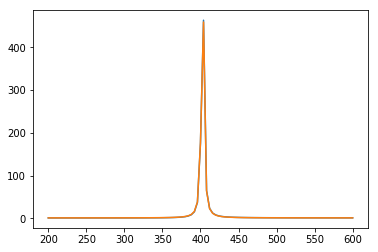

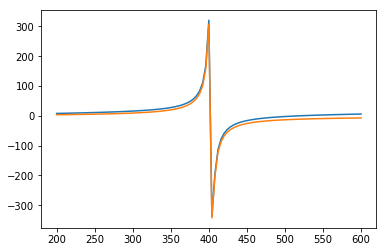

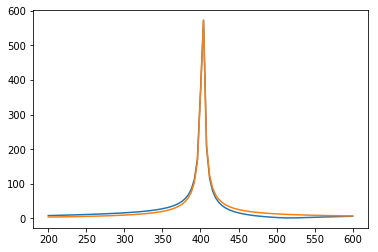

In [33]:
# para = np.array([1e-5, 150*1e-10, 450])
comp_imped = impe_model_RLC(para[0], para[1], para[2], para[3], freq)
freq_plot = freq*1e-3
plt.figure()
# plt.plot(freq, np.abs(S11))
plt.plot(freq_plot, np.real(imped))
plt.plot(freq_plot, np.real(comp_imped))

plt.figure()
plt.plot(freq_plot, np.imag(imped))
plt.plot(freq_plot, np.imag(comp_imped))

plt.figure()
plt.plot(freq_plot, np.abs(imped))
plt.plot(freq_plot, np.abs(comp_imped))